<a href="https://colab.research.google.com/github/MALLI7622/Deep-Learning-with-PyTorch/blob/master/DeepCNN_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim


In [2]:
transform_train = transforms.Compose([
                                      transforms.RandomResizedCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                      ])
transform_test = transforms.Compose([
                                    transforms.RandomResizedCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                  ])

In [3]:
trainset = torchvision.datasets.CIFAR10(root = './data', train= True,
                                               download = True, transform = transform_train)
testset = torchvision.datasets.CIFAR10(root = './data', train= False, 
                                       download = True, transform = transform_test)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
num_classes = 10

In [5]:
batch_size = 4

In [6]:
trainloader = torch.utils.data.DataLoader( trainset, batch_size= batch_size, shuffle= True)

In [7]:
dataset = iter(trainloader)

images, labels = dataset.next()

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
9


In [8]:
def imshow(img, title):
  npimg = img.numpy() / 2 + 0.5
  plt.figure(figsize= (batch_size, 1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.title(title)
  plt.show()

In [9]:
def show_batch_images(dataloder):
  images, labels = next(iter(dataloder))
  img = torchvision.utils.make_grid(images)
  imshow(img, title = [ str(x.item()) for x in labels])

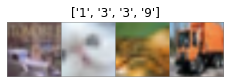

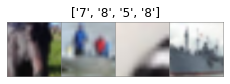

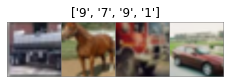

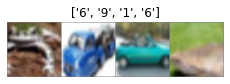

In [10]:
for i in range(4):
  show_batch_images(trainloader)

## VGG 16


In [12]:
from torchvision import models

In [13]:
vgg = models.vgg16_bn()

In [14]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [17]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [30]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])

In [34]:
print(*mod_classifier)

Linear(in_features=25088, out_features=4096, bias=True) ReLU(inplace=True) Dropout(p=0.5, inplace=False) Linear(in_features=4096, out_features=4096, bias=True) ReLU(inplace=True) Dropout(p=0.5, inplace=False) Linear(in_features=4096, out_features=10, bias=True)


In [36]:
vgg.classifier = nn.Sequential(*mod_classifier)

In [37]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [43]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [44]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle= True)
testloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle = True)

In [58]:
def evaluation(dataloader, model):

  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    output = model(inputs)
    _, pred = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [47]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr = 0.05)

In [63]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000 / batch_size)

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()
    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    del inputs, labels, outputs 
    torch.cuda.empty_cache()

    if i % 100 == 0:
      print('Iteration:',i, "/", n_iters,  "Loss:", "{:.2f}".format(loss.item()))

    loss_epoch_arr.append(loss.item())

    print('Epoch:',epoch,"/" , max_epochs, "Train Acc:","{:.2f}".format(evaluation(testloader, vgg)), 
          "Test Accu:","{:.2f}".format(evaluation(trainloader, vgg)))


Iteration: 0 / 3125.0 Loss: 6.28
Epoch: 0 / 1 Train Acc: 10.12 10.04
Epoch: 0 / 1 Train Acc: 10.00 10.01


KeyboardInterrupt: ignored

In [64]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = True)


In [65]:
vgg = models.vgg16_bn(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


In [69]:
for param in vgg.parameters():
  param.requires_grad = False
#print(vgg.classifier)

In [76]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [77]:
for param in vgg.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [78]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr = 0.05)

In [79]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000 / batch_size)

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()
    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    del inputs, labels, outputs 
    torch.cuda.empty_cache()

    if i % 100 == 0:
      print('Iteration:',i, "/", n_iters,  "Loss:", "{:.2f}".format(loss.item()))

    loss_epoch_arr.append(loss.item())

    print('Epoch:',epoch,"/" , max_epochs, "Train Acc:","{:.2f}".format(evaluation(testloader, vgg)), 
          "Test Accu:","{:.2f}".format(evaluation(trainloader, vgg)))


Iteration: 0 / 3125.0 Loss: 2.34
Epoch: 0 / 1 Train Acc: 12.14 Test Accu: 11.98


KeyboardInterrupt: ignored

In [80]:
import copy

In [81]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000 / batch_size)

min_loss = 1000

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()
    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(vgg.state_dict())
      print("Min Loss:", "{:.2f}".format(min_loss))

    del inputs, labels, outputs 
    torch.cuda.empty_cache()
    
    if i % 100 == 0:
      print('Iteration:',i, "/", n_iters,  "Loss:", "{:.2f}".format(loss.item()))

    loss_epoch_arr.append(loss.item())

    print('Epoch:',epoch,"/" , max_epochs, "Train Acc:","{:.2f}".format(evaluation(testloader, vgg)), 
          "Test Accu:","{:.2f}".format(evaluation(trainloader, vgg)))


Min Loss: 2.38
Iteration: 0 / 3125.0 Loss: 2.38


KeyboardInterrupt: ignored

In [82]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader, vgg), evaluation(testloader, vgg))

13.252 13.13


In [83]:
resnet = models.resnet18(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [84]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [85]:
for param in resnet.parameters():
  param.requires_grad = False
  

In [86]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [87]:
for param in resnet.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [88]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(resnet.parameters(), lr = 0.01)

In [89]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000 / batch_size)

min_loss = 1000

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()
    outputs = resnet(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(resnet.state_dict())
      print("Min Loss:", "{:.2f}".format(min_loss))

    del inputs, labels, outputs 
    torch.cuda.empty_cache()
    
    if i % 100 == 0:
      print('Iteration:',i, "/", n_iters,  "Loss:", "{:.2f}".format(loss.item()))

    loss_epoch_arr.append(loss.item())

    print('Epoch:',epoch,"/" , max_epochs, "Train Acc:","{:.2f}".format(evaluation(testloader, resnet)), 
          "Test Accu:","{:.2f}".format(evaluation(trainloader, resnet)))

Min Loss: 2.46
Iteration: 0 / 3125.0 Loss: 2.46
Epoch: 0 / 1 Train Acc: 10.85 Test Accu: 11.07
Min Loss: 2.42
Epoch: 0 / 1 Train Acc: 12.26 Test Accu: 11.80
Min Loss: 2.31
Epoch: 0 / 1 Train Acc: 10.53 Test Accu: 10.98
Min Loss: 2.12


KeyboardInterrupt: ignored

In [90]:
%%time
resnet.load_state_dict(best_model)
print(evaluation(trainloader, resnet), evaluation(testloader, resnet))

11.536 11.5
CPU times: user 2min 24s, sys: 27.5 s, total: 2min 51s
Wall time: 2min 52s


In [91]:
inception = models.inception_v3(pretrained= True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


In [92]:
print(inception)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [102]:
for param in inception.parameters():
  param.requires_grad = False

In [103]:
aux_in_features =  inception.AuxLogits.fc.in_features
inception.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)

In [104]:
for param in inception.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])


In [105]:
in_features = inception.fc.in_features  
inception.fc = nn.Linear(in_features, num_classes)

In [107]:
for param in inception.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])
torch.Size([10, 2048])
torch.Size([10])


In [108]:
transform_train = transforms.Compose([transforms.RandomResizedCrop(299),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, ), (0.5,))])

transform_test = transforms.Compose([transforms.RandomResizedCrop(299),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, ), (0.5,))])

In [111]:
trainset = torchvision.datasets.CIFAR10(root = './data', download = True,
                                          train = True, transform = transform_train)
testset = torchvision.datasets.CIFAR10(root = './data', download = True,
                                         train = False, transform = transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [112]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle= True)
testloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle= False)

In [114]:
inception = inception.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(inception.parameters(), lr = 0.01)

In [118]:
def evaluation_inception(dataloader, model):

  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    output, aux_output = model(inputs)
    _, pred = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [119]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000 / batch_size)

min_loss = 1000

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()
    outputs, aux_outputs = inception(inputs)
    loss = loss_fn(outputs, labels) + 0.3 * loss_fn(aux_outputs, labels)
    loss.backward()
    opt.step()

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(inception.state_dict())
      print("Min Loss:", "{:.2f}".format(min_loss))

    del inputs, labels, outputs 
    torch.cuda.empty_cache()
    
    if i % 100 == 0:
      print('Iteration:',i, "/", n_iters,  "Loss:", "{:.2f}".format(loss.item()))

    loss_epoch_arr.append(loss.item())

    print('Epoch:',epoch,"/" , max_epochs, "Train Acc:","{:.2f}".format(evaluation_inception(testloader, inception)), 
          "Test Accu:","{:.2f}".format(evaluation_inception(trainloader, inception)))

Min Loss: 3.19
Iteration: 0 / 3125.0 Loss: 3.19


KeyboardInterrupt: ignored

In [122]:
%%time
inception.load_state_dict(best_model)
print(evaluation_inception(trainloader, inception), evaluation_inception(testloader, inception))

10.94 10.58
CPU times: user 6min 32s, sys: 1min 59s, total: 8min 31s
Wall time: 8min 32s
